In [1]:
# @title Dowloand the demo data
# Let's start with loading the image for segmentation

!wget https://polybox.ethz.ch/index.php/s/ddFUpadTSRgDycr/download -O image_examples.zip
!unzip image_examples.zip
%cd /content/for_segmentation/
%cd /content

--2024-10-23 18:08:31--  https://polybox.ethz.ch/index.php/s/ddFUpadTSRgDycr/download
Resolving polybox.ethz.ch (polybox.ethz.ch)... 129.132.71.243
Connecting to polybox.ethz.ch (polybox.ethz.ch)|129.132.71.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3054155 (2.9M) [application/zip]
Saving to: ‘image_examples.zip’

image_examples.zip  100%[===================>]   2.91M  3.50MB/s    in 0.8s    

2024-10-23 18:08:33 (3.50 MB/s) - ‘image_examples.zip’ saved [3054155/3054155]

Archive:  image_examples.zip
   creating: for_segmentation/
  inflating: for_segmentation/tool.jpg  
  inflating: for_segmentation/.DS_Store  
  inflating: for_segmentation/coffee_tools.jpg  
  inflating: for_segmentation/notebook.jpg  
  inflating: for_segmentation/hemostata_pencil.jpg  
  inflating: for_segmentation/books_tools.jpg  
  inflating: for_segmentation/qr_code.jpg  
  inflating: for_segmentation/hemostat.jpg  
/content/for_segmentation
/content


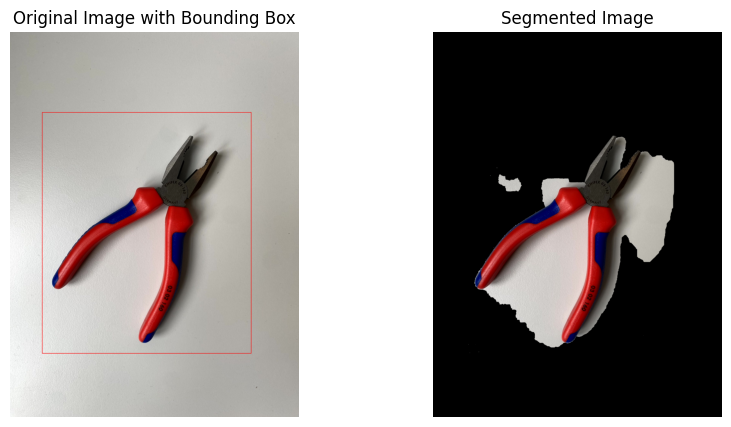

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to run GrabCut algorithm and visualize bounding box
def grabcut_segmentation(image_path, rect, n_iters=5):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying properly in matplotlib

    # Visualize the bounding box on the image
    img_with_rect = img.copy()  # Make a copy of the image
    cv2.rectangle(img_with_rect, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255, 0, 0), 2)  # Draw the rectangle

    # Create an initial mask (same size as image)
    mask = np.zeros(img.shape[:2], np.uint8)

    # Create background and foreground models (initial GMMs), needed by GrabCut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Apply the GrabCut algorithm with the rectangle
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, n_iters, cv2.GC_INIT_WITH_RECT)

    # Modify the mask: Set background (0 or 2) to 0, and foreground (1 or 3) to 1
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Segment the image by multiplying the original image with the modified mask
    segmented_img = img * mask2[:, :, np.newaxis]

    return img_with_rect, segmented_img

# Display the results
def display_images(original_img, segmented_img):
    plt.figure(figsize=(10, 5))

    # Display the original image with bounding box
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image with Bounding Box')
    plt.axis('off')

    # Display the segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img)
    plt.title('Segmented Image')
    plt.axis('off')

    plt.savefig('segmented_image.png', dpi=300)
    plt.show()

# Path to the image file (replace with your own path)
image_path = '/content/for_segmentation/tool.jpg'  # Replace with your image path

# Define the rectangle for GrabCut (x, y, width, height)
# Adjust this based on your image
rect = (200, 500, 1300, 1500)  # Change these values based on your object location

# Run the segmentation
original_img_with_rect, segmented_img = grabcut_segmentation(image_path, rect, n_iters=10)

# Display the images
display_images(original_img_with_rect, segmented_img)